<a href="https://colab.research.google.com/github/markriis/IDS-pollution-of-cities/blob/main/Prediction_Sander.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# Importing modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

In [61]:
!wget https://github.com/markriis/IDS-pollution-of-cities/raw/main/model_data_2873.p
!wget https://github.com/markriis/IDS-pollution-of-cities/raw/main/model_data_3663.p

dataS = pickle.load(open( "model_data_2873.p", "rb" ))
dataL = pickle.load(open( "model_data_3663.p", "rb" ))

--2023-12-10 16:54:24--  https://github.com/markriis/IDS-pollution-of-cities/raw/main/model_data_2873.p
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/markriis/IDS-pollution-of-cities/main/model_data_2873.p [following]
--2023-12-10 16:54:24--  https://raw.githubusercontent.com/markriis/IDS-pollution-of-cities/main/model_data_2873.p
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 575722 (562K) [application/octet-stream]
Saving to: ‘model_data_2873.p.1’

model_data_2873.p.1 100%[===================>] 562.23K  --.-KB/s    in 0.06s   

2023-12-10 16:54:24 (9.65 MB/s) - ‘model_data_2873.p.1’ saved [

In [62]:
dataL.head()

,country,city,year,PM2.5,PM10,NO2,population,country population,gdp,cement_co2,...,energy_per_capita,energy_per_gdp,gas_co2,gas_co2_per_capita,oil_co2,oil_co2_per_capita,primary_energy_consumption,hdi,le,gnipc
0,Argentina,Buenos Aires,2015,10.26,27.87,NaN,12847328.0,43257064.0,8.478550e+11,4.571,...,23046.873,1.176,93.535,2.162,86.954,2.010,996.940,0.848,76.7602,23508.76738
1,Argentina,Buenos Aires,2016,NaN,26.88,15.35,13879707.0,43668236.0,8.283729e+11,4.029,...,22726.455,1.198,96.303,2.205,84.556,1.936,992.424,0.847,76.3077,22694.28510
2,Argentina,Buenos Aires,2017,NaN,25.40,19.57,14340951.0,44054616.0,8.504822e+11,4.362,...,22503.818,1.166,96.442,2.189,80.856,1.835,991.397,0.851,76.8330,22996.67142
3,Argentina,Buenos Aires,2018,NaN,24.40,16.60,14802195.0,44413592.0,8.293733e+11,4.369,...,22163.160,1.187,96.123,2.164,74.392,1.675,984.346,0.850,76.9994,21924.73119
4,Argentina,Buenos Aires,2019,NaN,25.50,18.25,15263440.0,44745516.0,8.298735e+11,4.141,...,20725.168,0.000,95.608,2.137,74.848,1.673,927.358,0.852,77.2845,21197.74104


In [63]:
def split_no_NaN(df):
  return {'PM2.5' : df[~df['PM2.5'].isna()].drop(columns=['PM10', 'NO2']),
          'PM10' : df[~df['PM10'].isna()].drop(columns=['PM2.5', 'NO2']),
          'NO2' : df[~df['NO2'].isna()].drop(columns=['PM10', 'PM2.5'])}

In [64]:
dataSs = split_no_NaN(dataS)
dataLs = split_no_NaN(dataL)
dataSs['PM10'].head()

,country,city,year,PM10,population,country population,gdp,cement_co2,cement_co2_per_capita,co2,...,energy_per_capita,energy_per_gdp,gas_co2,gas_co2_per_capita,oil_co2,oil_co2_per_capita,primary_energy_consumption,hdi,le,gnipc
1,Argentina,Buenos Aires,2015,27.87,1.369947e+07,43257064.0,8.478550e+11,4.571,0.106,191.744,...,23046.873,1.176,93.535,2.162,86.954,2.010,996.940,0.848,76.7602,23508.76738
2,Argentina,Buenos Aires,2016,26.88,1.345136e+07,43668236.0,8.283729e+11,4.029,0.092,189.920,...,22726.455,1.198,96.303,2.205,84.556,1.936,992.424,0.847,76.3077,22694.28510
3,Argentina,Buenos Aires,2017,25.40,1.434095e+07,44054616.0,8.504822e+11,4.362,0.099,186.899,...,22503.818,1.166,96.442,2.189,80.856,1.835,991.397,0.851,76.8330,22996.67142
4,Argentina,Buenos Aires,2018,24.40,1.480220e+07,44413592.0,8.293733e+11,4.369,0.098,180.599,...,22163.160,1.187,96.123,2.164,74.392,1.675,984.346,0.850,76.9994,21924.73119
5,Argentina,Buenos Aires,2019,25.50,1.503247e+07,44745516.0,8.298735e+11,4.141,0.093,178.512,...,20725.168,0.000,95.608,2.137,74.848,1.673,927.358,0.852,77.2845,21197.74104


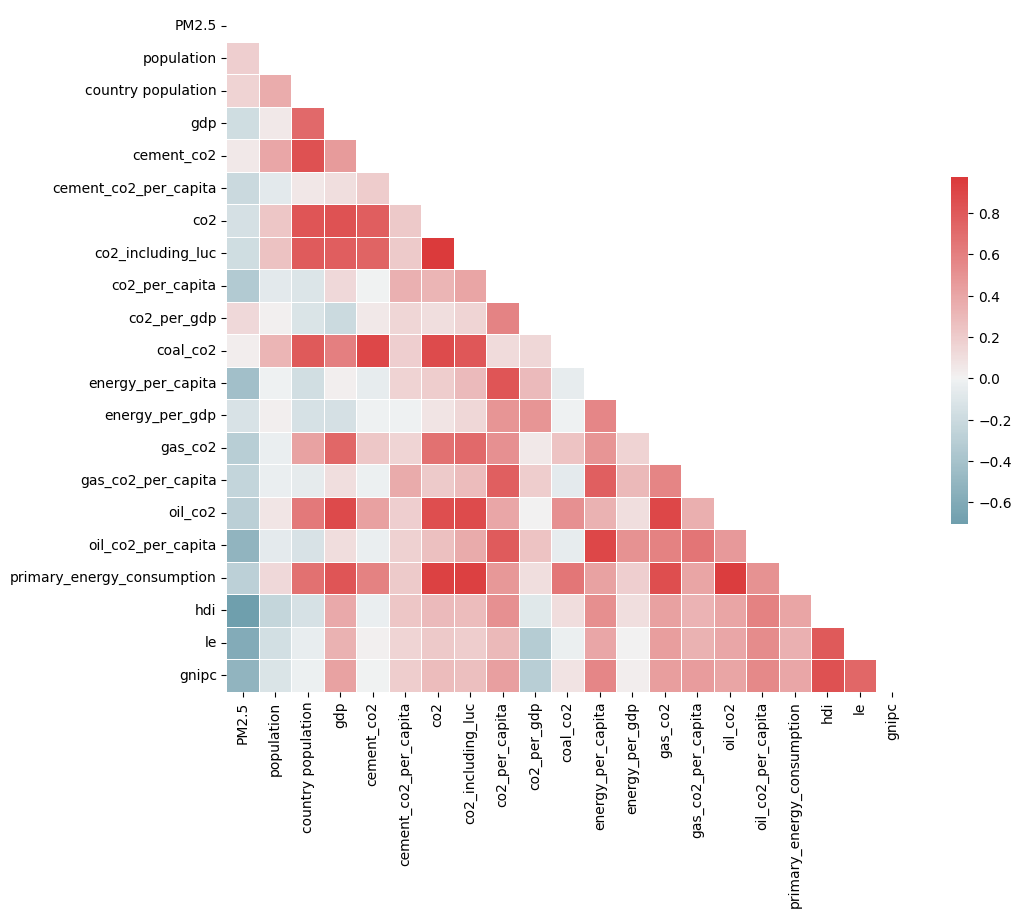

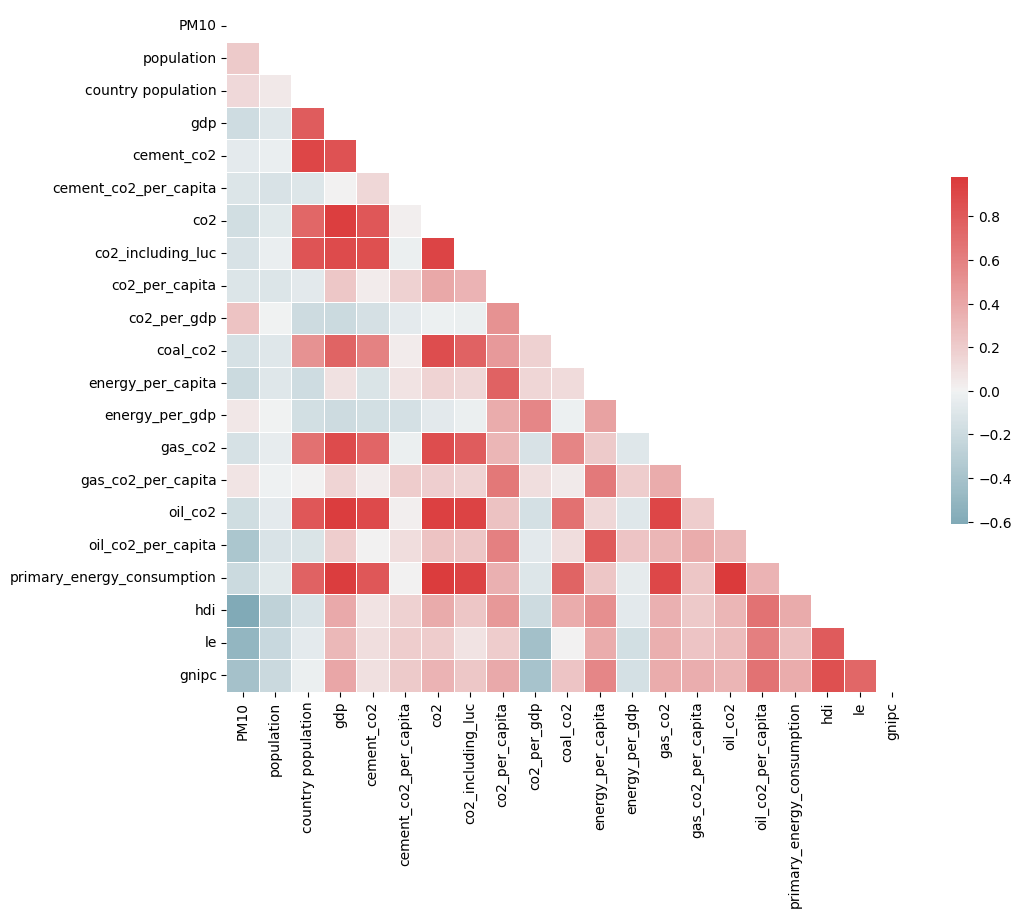

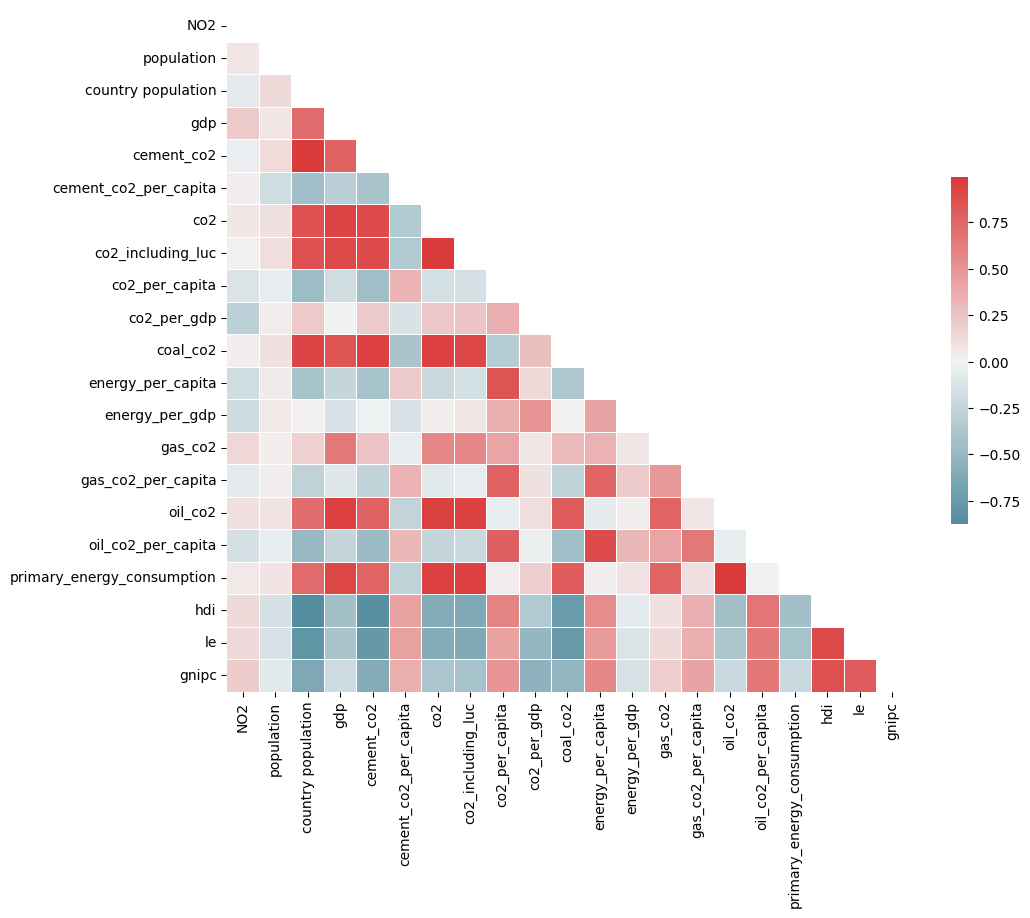

In [80]:
for df in dataSs.values():
  corr = df.iloc[:, 3:].corr()
  # https://seaborn.pydata.org/examples/many_pairwise_correlations.html
  # Generate a mask for the upper triangle
  mask = np.triu(np.ones_like(corr, dtype=bool))

  # Set up the matplotlib figure
  fig, ax = plt.subplots(figsize=(11, 9))

  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(220, 12, as_cmap=True)

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [66]:
def airCorr(data):
  corr = pd.DataFrame(columns=data.keys())
  for name, df in data.items():
    corr[name] = df.iloc[:, 4:].corrwith(df[name])
  return corr

<Axes: >

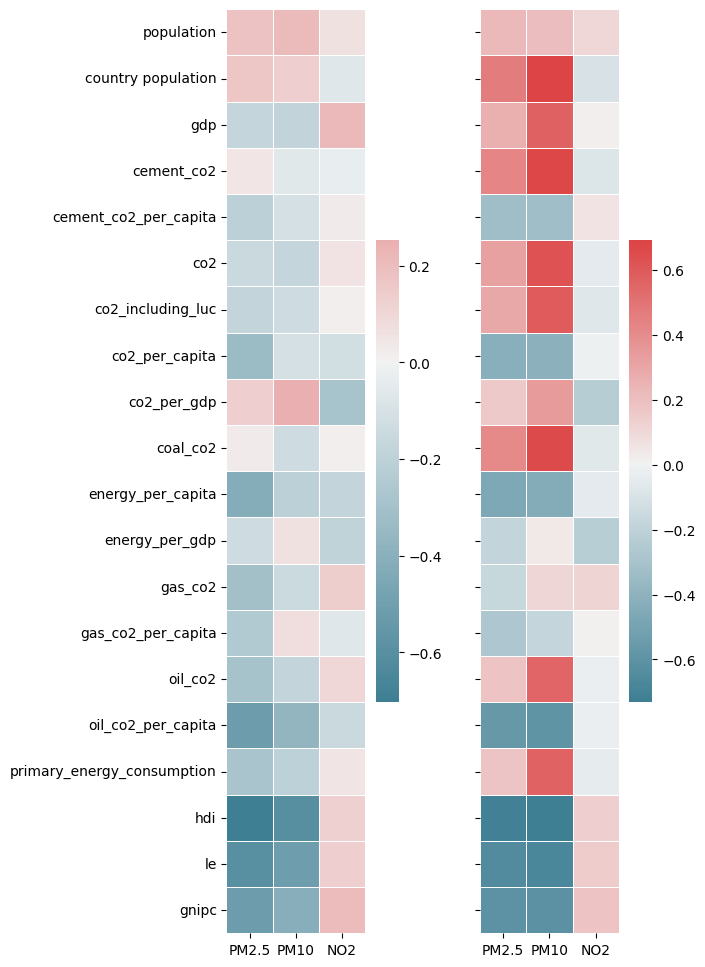

In [79]:
# Set up the matplotlib figure
fig, ax = plt.subplots(1, 2, figsize=(6, 12), sharey=True)
#ax.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)

sns.heatmap(airCorr(dataSs), cmap=cmap, center=0, linewidths=.5, cbar_kws={"shrink": .5}, square=True, ax = ax[0])
sns.heatmap(airCorr(dataLs), cmap=cmap, center=0, linewidths=.5, cbar_kws={"shrink": .5}, square=True, ax = ax[1])


In [68]:
from sklearn.preprocessing import StandardScaler

for name, df in dataSs.items():
  scaler = StandardScaler().fit(df.iloc[:, 4:])
  dataSs[name].iloc[:, 4:] = scaler.transform(df.iloc[:, 4:])

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

coefs = pd.DataFrame(columns=dataSs.keys())
for name, df in dataSs.items():
  ll = linear_model.Lasso(max_iter=10000, alpha = 0.3, tol=1e-5).fit(df.iloc[:, 4:], df[name])

  coefs[name] = pd.DataFrame(ll.coef_, index = df.columns.values[4:], columns = [0])
  print(f'The Lasso LR coeficientts for {name} are \n{coefs[name]} \nand the intercept is {ll.intercept_}. The model got a score of {cross_val_score(linear_model.Lasso(), df.iloc[:, 4:], df[name], cv=4).sum()/4}')

<Axes: >

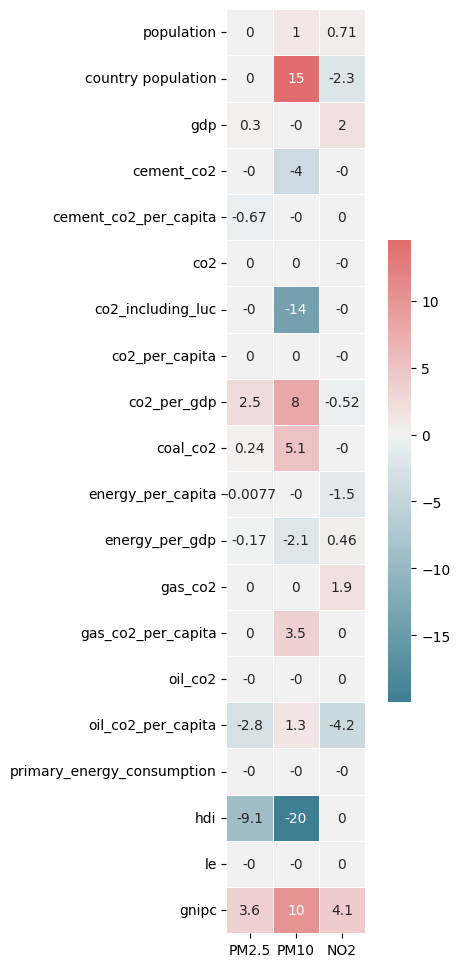

In [82]:
fig, ax = plt.subplots(figsize=(6, 12))
#ax.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)

sns.heatmap(coefs, cmap=cmap, center=0, linewidths=.5, cbar_kws={"shrink": .5}, square=True, annot=True)

In [86]:
to_use = {}

for c in coefs.columns.values:
  to_use[c] = coefs.loc[coefs[c] != 0, c].index.values

to_use

{'PM2.5': array(['gdp', 'cement_co2_per_capita', 'co2_per_gdp', 'coal_co2',
        'energy_per_capita', 'energy_per_gdp', 'oil_co2_per_capita', 'hdi',
        'gnipc'], dtype=object),
 'PM10': array(['population', 'country population', 'cement_co2',
        'co2_including_luc', 'co2_per_gdp', 'coal_co2', 'energy_per_gdp',
        'gas_co2_per_capita', 'oil_co2_per_capita', 'hdi', 'gnipc'],
       dtype=object),
 'NO2': array(['population', 'country population', 'gdp', 'co2_per_gdp',
        'energy_per_capita', 'energy_per_gdp', 'gas_co2',
        'oil_co2_per_capita', 'gnipc'], dtype=object)}

In [91]:
def plot_comp(pred, real, score):
  fig, ax = plt.subplots(figsize=(10,4))

  df = pd.DataFrame({f'Predicted (score {score})' : pred, 'Real' : real})
  df.sort_values('Real', inplace=True)
  df.reset_index(inplace=True, drop=True)

  for c in df.columns.values:
    ax.plot(df.index, df[c], label=c, linewidth=1)


  ax.legend(loc='upper left')
  plt.show()

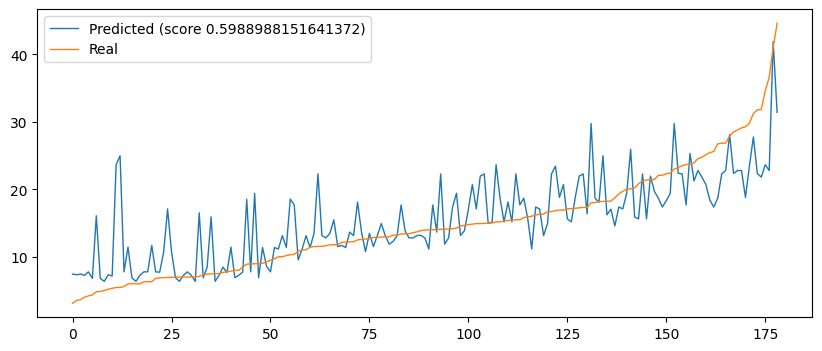

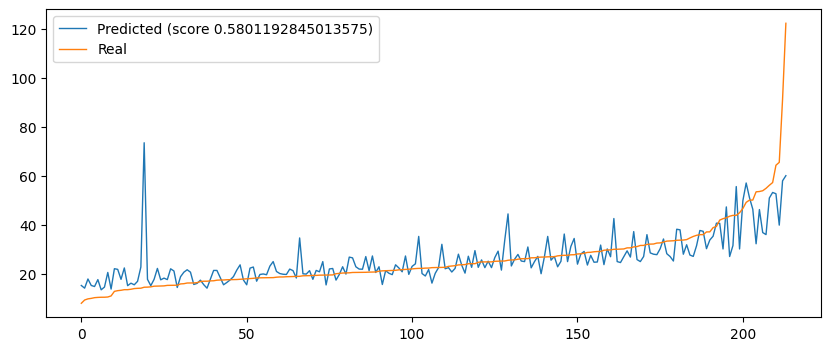

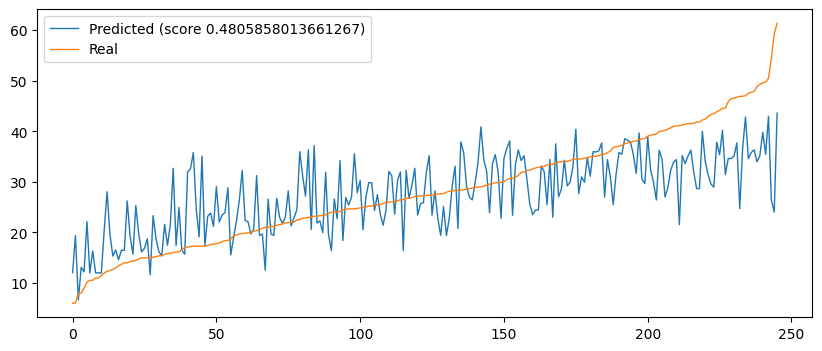

In [93]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

models = {}
for name, df in dataSs.items():
  X_train, X_test, y_train, y_test = train_test_split(df[to_use[name]], df[name], test_size=0.1, random_state=0)
  gbr = GradientBoostingRegressor(random_state=42).fit(X_train, y_train)

  score = gbr.score(X_test, y_test)
  plot_comp(gbr.predict(X_test), y_test, score)

  models[f'GBR_{name}'] = gbr
